In [35]:
##Cell 1

import pandas as pd
from datetime import time
import datetime
import vectorbt as vbt
import os
import numpy as np
import requests
import json
from binance import Client
import talib

In [70]:
##Cell 2

def return_asset(name='BTCUSDT',start = '01/01/2016',stop = '12/31/2999', interval='2HR'): 
    coin = name
    API_KEY = 'API KEY HERE'
    API_SECRET = 'API SECRET HERE'

    client = Client(API_KEY, API_SECRET)
    coin_currency = coin.upper()
    if interval=='1HR':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_1HOUR, start, stop)
    
    if interval=='2HR':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_2HOUR, start, stop)
        
    if interval=='4HR':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_4HOUR, start, stop)
        
    if interval=='8HR':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_8HOUR, start, stop)
        
    if interval=='12HR':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_12HOUR, start, stop)
        
    if interval=='1D':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_1DAY, start, stop)
        
    if interval=='3D':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_3DAY, start, stop)
        
    if interval=='1WK':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_1WEEK, start, stop)
        
    if interval=='1MO':
        klines = client.get_historical_klines(coin_currency, Client.KLINE_INTERVAL_1MONTH, start, stop)
        
##build out rest of time dictionary***

    df = pd.DataFrame(klines, columns=['openTime', 'open', 'high', 'low', 'close', 'volume', 'closeTime', 'quoteAssetVolume',
                                        'numberOfTrades', 'takerBuyBaseAssetVolume', 'takerBuyQuoteAssetVolume', 'ignore'])
    df['date'] = pd.to_datetime(df['closeTime'], unit='ms')
    df['date'] = pd.to_datetime(df['date'], utc=True)
    df.set_index('date', inplace=True)
    df = df[['open','high','low','close','volume']]
    df.rename(columns={'open':'Open', 'high':'High', 'low':'Low', 'volume':'Volume', 'close':'Close'}, inplace=True)
    df = df.astype(float)
    return df

    ## ohlcv_wbuf = df.copy()
    ## print(ohlcv_wbuf.shape)
    ## print(ohlcv_wbuf.columns)

In [71]:
## Cell 3

df = return_asset('BTCUSDT', start='01/01/2016', stop='01/01/2999', interval='2HR')

In [72]:
## Cell 4 (keep commented out while using Jupyter Notebooks please)

## import talib

In [73]:
## Cell 5 (sorts OHLCV data in a table for specified asset in cell 3)
## use command 'head' for top of list, use command 'tail' for bottom of list

df.tail(10)

,Open,High,Low,Close,Volume
date,,,,,
2022-01-26 23:59:59.999000+00:00,36327.35,36886.68,36234.63,36809.34,3736.29647
2022-01-27 01:59:59.999000+00:00,36807.24,37080.00,35833.56,35882.21,5450.31865
2022-01-27 03:59:59.999000+00:00,35882.21,36243.32,35507.01,35745.70,5326.26834
2022-01-27 05:59:59.999000+00:00,35745.70,36091.00,35692.61,35973.39,5108.72430
2022-01-27 07:59:59.999000+00:00,35977.88,36303.80,35818.77,36173.87,3732.48585
2022-01-27 09:59:59.999000+00:00,36177.17,36611.21,35815.80,36525.85,4407.07968
2022-01-27 11:59:59.999000+00:00,36525.84,36781.79,36290.01,36679.98,3092.71753
2022-01-27 13:59:59.999000+00:00,36679.98,36849.37,36423.46,36830.89,3698.91579
2022-01-27 15:59:59.999000+00:00,36830.88,37199.00,36510.00,36639.43,4966.14545


In [74]:
## Cell 6 (Trade Settings- Starting Capital, Trade Fees, Slippage)

vbt.settings.portfolio['init_cash'] = 1000000.00  # $1mm Portfolio
vbt.settings.portfolio['fees'] = 0.0025  # 0.25%
vbt.settings.portfolio['slippage'] = 0.0025  # 0.25%

In [75]:
## Cell 7 (Open, High, Low, Close, Volume for an asset plotted in chart format)

df.vbt.ohlcv.plot()

FigureWidget({
    'data': [{'close': array([ 4315.32,  4349.99,  4444.  , ..., 36830.89, 36639.43, 36686.26])…

In [78]:
## Cell 8 (Trading Dictionary)
df['MA8'] = talib.MA(df['Close'],8)
df['MA10'] = talib.MA(df['Close'],10)
df['MA20'] = talib.MA(df['Close'],20)
df['MA30'] = talib.MA(df['Close'],30)
df['MA34'] = talib.MA(df['Close'],34)
df['MA40'] = talib.MA(df['Close'],40)
df['MA50'] = talib.MA(df['Close'],50)
df['MA60'] = talib.MA(df['Close'],60)
df['MA70'] = talib.MA(df['Close'],70)
df['MA80'] = talib.MA(df['Close'],80)
df['MA90'] = talib.MA(df['Close'],90)
df['MA100'] = talib.MA(df['Close'],100)
df['MA110'] = talib.MA(df['Close'],110)
df['MA120'] = talib.MA(df['Close'],120)
df['MA130'] = talib.MA(df['Close'],130)
df['MA140'] = talib.MA(df['Close'],140)
df['MA150'] = talib.MA(df['Close'],150)
df['MA160'] = talib.MA(df['Close'],160)
df['MA170'] = talib.MA(df['Close'],170)
df['MA180'] = talib.MA(df['Close'],180)
df['MA190'] = talib.MA(df['Close'],190)
df['MA200'] = talib.MA(df['Close'],200)
df['MA334'] = talib.MA(df['Close'],200)
df['MA355'] = talib.MA(df['Close'],355)


In [79]:
## Cell 8 New Test Strategy Cell
# df

<AxesSubplot:xlabel='date'>

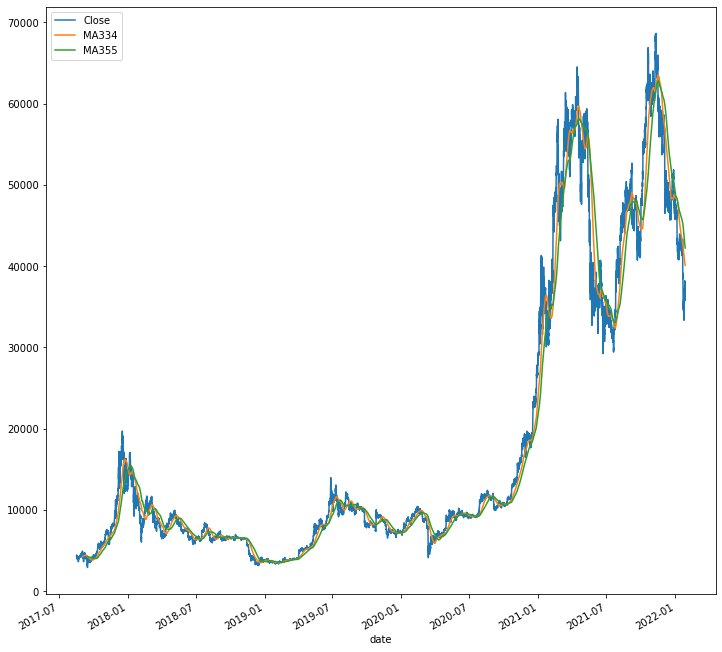

In [80]:
## Cell 9 (Strategy Plot Basic TA)

df[['Close', 'MA334', 'MA355' ]].plot(figsize=(12,12))

In [81]:
## Cell 10 (Entries and Exits)
## Moving Average Crossover code pair

exits = (df['MA334'] < df['MA355']) & (df['MA334'].shift() >= df['MA355'].shift())  
entries = (df['MA334'] > df['MA355']) & (df['MA334'].shift() <= df['MA355'].shift())

In [ ]:
## Cell 11 (Trade Signal Statistics)

print(entries.vbt.signals.stats(settings=dict(other=exits)))

In [83]:
## Cell 12 (Portfolio results from backtesting strategy)

dmac_pf = vbt.Portfolio.from_signals(df['Close'], entries, exits)
print(dmac_pf.stats())

/Users/nickharmon/opt/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sharpe_ratio' requires frequency to be set

/Users/nickharmon/opt/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'calmar_ratio' requires frequency to be set

/Users/nickharmon/opt/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'omega_ratio' requires frequency to be set

/Users/nickharmon/opt/anaconda3/lib/python3.9/site-packages/vectorbt/generic/stats_builder.py:396: UserWarning:

Metric 'sortino_ratio' requires frequency to be set



Start                         2017-08-17 05:59:59.999000+00:00
End                           2022-01-27 17:59:59.999000+00:00
Period                                                   19443
Start Value                                          1000000.0
End Value                                      19119237.797054
Total Return [%]                                    1811.92378
Benchmark Return [%]                                750.139966
Max Gross Exposure [%]                                   100.0
Total Fees Paid                                 1084534.907551
Max Drawdown [%]                                     56.780965
Max Drawdown Duration                                   6123.0
Total Trades                                                27
Total Closed Trades                                         27
Total Open Trades                                            0
Open Trade PnL                                             0.0
Win Rate [%]                                         44

In [84]:
##Cell 13 (Plot and graph trade strategies)

# print(dmac_pf.trades.records)

dmac_pf.trades.plot()#.show_svg()

FigureWidget({
    'data': [{'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showl…